In [7]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
%matplotlib inline

In [8]:
patient_data=pd.read_csv(r'C:\Users\lolid\Desktop\big_patient_data.csv', encoding='utf-8',index_col=0)
patient_data

,pat_id,cardio_id,heartbeat_id,age,sex,n_peaks,len_peaks,len_avg,average_y,y_mean
0,1,1,1,25,0,68.0,68.0,64.750000,0.056244,0.080326
1,1,1,2,25,0,97.0,97.0,65.000000,0.065803,0.080326
2,1,1,3,25,0,105.0,105.0,73.750000,0.075155,0.080326
3,1,1,4,25,0,98.0,98.0,88.000000,0.074859,0.080326
4,1,1,5,25,0,128.0,128.0,88.250000,0.335485,0.080326
...,...,...,...,...,...,...,...,...,...,...
5178,62,4,18,68,0,17.0,17.0,35.833333,0.379480,0.099754
5179,62,4,19,68,0,27.0,27.0,41.500000,0.379931,0.099754
5180,62,4,20,68,0,91.0,91.0,31.846154,0.406640,0.099754
5181,62,4,21,68,0,20.0,20.0,42.200000,0.408910,0.099754


In [9]:
X=patient_data.drop(['pat_id','cardio_id', 'heartbeat_id','age','sex'], axis=1)
y=patient_data.pat_id # таргет

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [11]:
max_depth_values=range(1,100)

In [12]:
scores_data=pd.DataFrame()

Цикл для поиска оптимальной глубины дерева

In [13]:
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score=clf.score(X_train, y_train)
    test_score=clf.score(X_test, y_test)

    mean_cross_val_score=cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data=pd.DataFrame({'max_depth': [max_depth], 
    'train_score': [train_score], 
    'test_score': [test_score],
    'cross_val_score': [mean_cross_val_score]})
    
    scores_data=scores_data.append(temp_score_data)

C:\Users\lolid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lolid\AppData\Local\Temp\ipykernel_19680\2711024149.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data=scores_data.append(temp_score_data)
C:\Users\lolid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lolid\AppData\Local\Temp\ipykernel_19680\2711024149.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data=scores_data.append(temp_score_data)
C:\Users\lolid\AppData\Local\Programs\Python\Pytho

In [14]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.184044,0.198130,0.178858
0,2,0.216302,0.205143,0.209388
0,3,0.263825,0.266511,0.258642
0,4,0.333525,0.337230,0.326325
0,5,0.419355,0.413209,0.401501


<AxesSubplot:xlabel='max_depth', ylabel='score'>

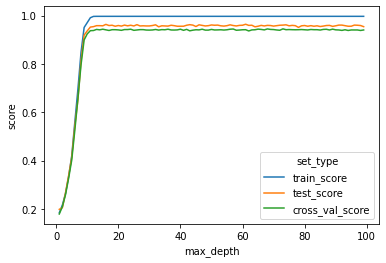

In [15]:
scores_data_long=pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score','test_score','cross_val_score'], 
var_name='set_type',value_name='score')
sns.lineplot(x='max_depth', y='score', hue='set_type',data=scores_data_long)

Из графика видно, что наилучшей глубиной дерева является 15. Создаем новый классификатор

In [16]:
best_clf=tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=15)

In [19]:
cross_val_score(clf, X_test, y_test, cv=5, scoring='f1_weighted').mean()

C:\Users\lolid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.864834745720605